# Analytics

## Library

In [4]:
import pandas as pd
import awswrangler as wr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Import from Athena

In [2]:
query = '''SELECT * FROM econ.data_mensual'''

In [5]:
data = wr.athena.read_sql_query(
    query, 
    database="econ", 
    ctas_approach=False
)

2025-03-20 01:13:05,448	WARNING services.py:2022 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=2.15gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2025-03-20 01:13:06,613	INFO worker.py:1819 -- Started a local Ray instance.


## Regression

In [8]:
data.head()

,date,inflacion,tasa_de_interes,tipo_de_cambio
0,2008-02-01,0.928129,10.8138,7.50
1,2008-04-01,2.284987,10.5985,7.50
2,2008-07-01,3.564109,10.3908,7.75
3,2008-08-01,4.067435,9.9705,8.00
4,2008-09-01,5.131406,10.3423,8.25


In [9]:
# Define regression function
def run_regression(x, y, df, title):
    X = df[x]
    Y = df[y]
    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(Y, X).fit()
    
    # Print summary
    print(f"Regression: {y} ~ {x}")
    print(model.summary())
    
    # Plot results
    plt.figure(figsize=(8,5))
    sns.regplot(x=df[x], y=df[y], line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

Regression: tipo_de_cambio ~ tasa_de_interes
                            OLS Regression Results                            
Dep. Variable:         tipo_de_cambio   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.3861
Date:                Thu, 20 Mar 2025   Prob (F-statistic):              0.536
Time:                        01:14:00   Log-Likelihood:                -124.10
No. Observations:                  69   AIC:                             252.2
Df Residuals:                      67   BIC:                             256.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

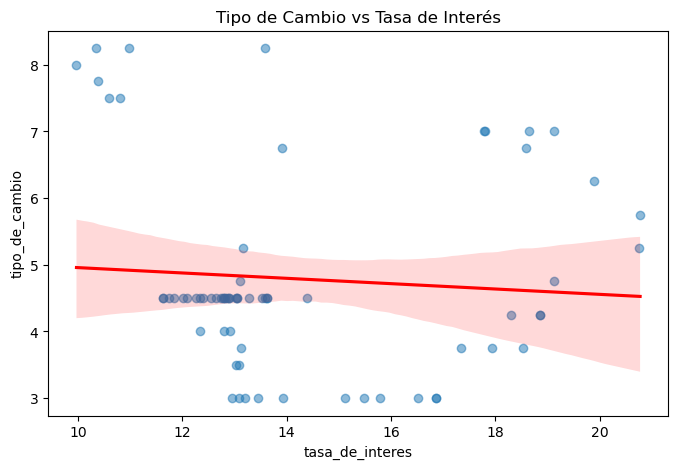

In [10]:
run_regression('tasa_de_interes', 'tipo_de_cambio', data, 'Tipo de Cambio vs Tasa de Interés')


Regression: tasa_de_interes ~ inflacion
                            OLS Regression Results                            
Dep. Variable:        tasa_de_interes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.2461
Date:                Thu, 20 Mar 2025   Prob (F-statistic):              0.621
Time:                        01:14:04   Log-Likelihood:                -168.01
No. Observations:                  69   AIC:                             340.0
Df Residuals:                      67   BIC:                             344.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

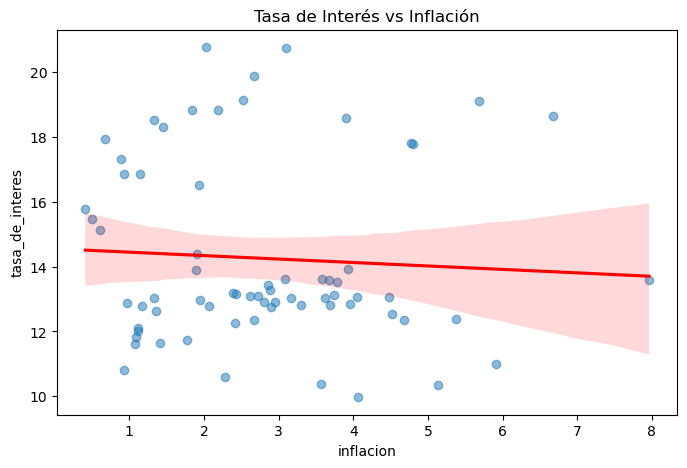

In [11]:
run_regression('inflacion', 'tasa_de_interes', data, 'Tasa de Interés vs Inflación')


Regression: tipo_de_cambio ~ inflacion
                            OLS Regression Results                            
Dep. Variable:         tipo_de_cambio   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     28.18
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.35e-06
Time:                        01:14:07   Log-Likelihood:                -112.19
No. Observations:                  69   AIC:                             228.4
Df Residuals:                      67   BIC:                             232.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

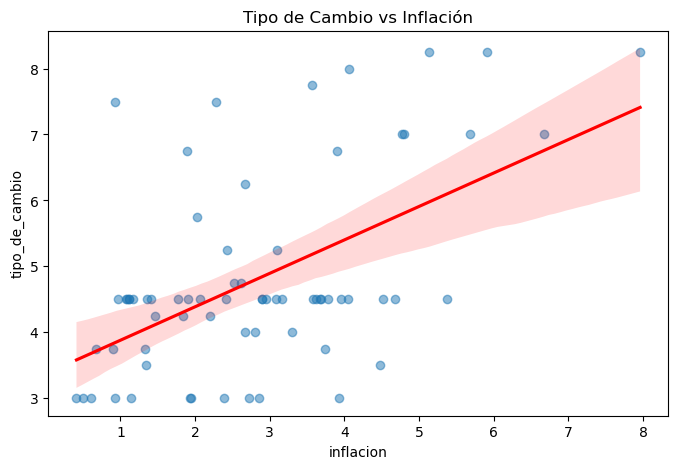

In [12]:
run_regression('inflacion', 'tipo_de_cambio', data, 'Tipo de Cambio vs Inflación')